In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)


In [5]:
df = pd.read_csv("c:/Users/Acer/Downloads/mtcars.csv")
# To display the top 5 rows 
df.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
df.tail(5) 

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [7]:
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [9]:
df = df.drop(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat'], axis=1)
df.head(5)

,wt,qsec,vs,am,gear,carb
0,2.620,16.46,0,1,4,4
1,2.875,17.02,0,1,4,4
2,2.320,18.61,1,1,4,1
3,3.215,19.44,1,0,3,1
4,3.440,17.02,0,0,3,2


In [10]:
df = df.rename(columns={"model": "hp", "mpg": "cyl", "drat": "disp", "wt": "qsec","vs": "am", "gear": "carb", "hp": "mpg" })
df.head(5)

,qsec,qsec,am,am,carb,carb
0,2.620,16.46,0,1,4,4
1,2.875,17.02,0,1,4,4
2,2.320,18.61,1,1,4,1
3,3.215,19.44,1,0,3,1
4,3.440,17.02,0,0,3,2


In [11]:
df.shape


(32, 6)

In [12]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


In [13]:
df.count()   

qsec    32
qsec    32
am      32
am      32
carb    32
carb    32
dtype: int64

In [14]:
df = df.drop_duplicates()
df.head(5)

,qsec,qsec,am,am,carb,carb
0,2.620,16.46,0,1,4,4
1,2.875,17.02,0,1,4,4
2,2.320,18.61,1,1,4,1
3,3.215,19.44,1,0,3,1
4,3.440,17.02,0,0,3,2


In [15]:
df.count()

qsec    32
qsec    32
am      32
am      32
carb    32
carb    32
dtype: int64

In [16]:
print(df.isnull().sum())

qsec    0
qsec    0
am      0
am      0
carb    0
carb    0
dtype: int64


In [17]:
df = df.dropna()    # Dropping the missing values.
df.count()

qsec    32
qsec    32
am      32
am      32
carb    32
carb    32
dtype: int64

In [18]:
print(df.isnull().sum())

qsec    0
qsec    0
am      0
am      0
carb    0
carb    0
dtype: int64


In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

qsec    1.02875
qsec    2.00750
am      1.00000
am      1.00000
carb    1.00000
carb    2.00000
dtype: float64


In [25]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(27, 6)

,qsec,qsec,am,am,carb,carb
qsec,1.000000,-0.254523,-0.529467,-0.804485,-0.643562,0.368271
qsec,-0.254523,1.000000,0.800427,-0.119840,-0.212450,-0.698735
am,-0.529467,0.800427,1.000000,0.182323,0.193201,-0.548770
am,-0.804485,-0.119840,0.182323,1.000000,0.792629,-0.012589
carb,-0.643562,-0.212450,0.193201,0.792629,1.000000,0.243587
carb,0.368271,-0.698735,-0.548770,-0.012589,0.243587,1.000000


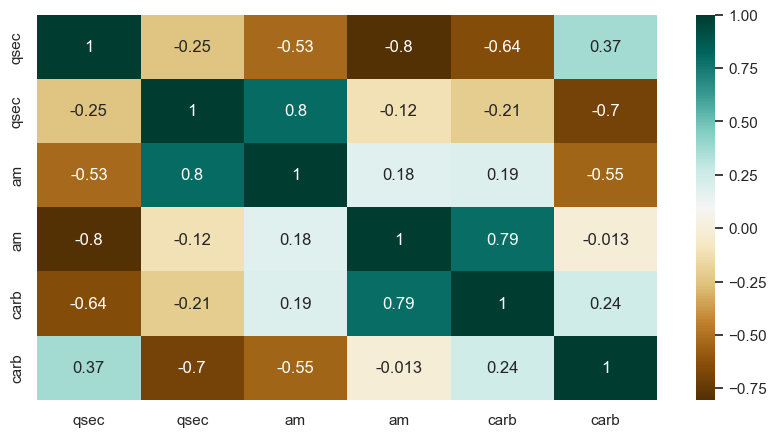

In [28]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c